# Avengers Database Exploration
***
### Description

As an employee of The Walt Disney Company with a great interest in the Avengers franchise, I was excited to find a database providing extensive data on the avengers provided by [FiveThirtyEight](https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv). The goal of this project will be to practice fundamental Exploratory Data Analysis, try to derive some conclusions based on visualizations, and see if it's possible to create a machine learning model based on dataset attributes. 

As a note, I kept this file local to minimize the requests I was sending to site. Given that this is a personal project, I don't intend to update this frequently.
***

### Loading Necessary Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring the Data

In [98]:
df = pd.read_csv('avengers.csv')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [99]:
df.info()
df['Death1'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

NO     104
YES     69
Name: Death1, dtype: int64

#### Observations
Right off the bat, we notice a couple of things about each column...
- `URL`: Not necessary. **We can omit this from the sorted df**
- `Name`: Categorical variable. Will be psuedo-index
- `Appearances`: Quantitative variable. Likely useful in a regression model.
- `Current?`: Categorical Variable. Describes if they are current. **Should change this to boolean.**
- `Gender`: Categorical Variable. **Should dummy this variable for modelling.**
- `Probationary Introl`: Categorical date variable. Date they appeared in comics as a probationary member. **Fix this name**
- `Full/Reserve Avengers Intro`: Categorical date variable. Date they appeared in comics as a full member.
- `Year`: Quantitative variable. year the avenger was introduced.
- `Years since joining`: Quantitative variable. 2015 - year they were introduced. **Will need to apply a lambda function to add 6 years.**
- `Honorary`: Categorical variable. Describing status of the avenger. **Will need to change to "status"**
- `Death(1-5)`: Categorical variable. "Yes" if avenger dies. **Should combine to a # of deaths column.**
- `Return(1-5)`: Categorical variable. "Yes" if avenger comes back from dead. **Should combine to a # returns column.**
- `Notes`: Categorical variable. **We can omit this from the sorted df.**

### Cleaning

In [100]:
# Current?
df['Current?'] = df['Current?'].apply(lambda x: True if str(x) == "YES" else False)

In [101]:
# Gender
gender = pd.get_dummies(data=df['Gender'])
df = pd.concat([df, gender], axis=1)

In [102]:
# Years since joining
"""This reflects the current year"""
df['Years since joining'] = df['Years since joining'] + 6

In [103]:
# Honorary (Status)
df.rename(columns = {'Honorary': 'Status'}, inplace = True)
status = pd.get_dummies(df['Status'])
df = pd.concat([df, status], axis=1)

In [104]:
# Deaths and Returns
for i in range(1,6):
    death_col = 'Death' + str(i)
    return_col = 'Return' + str (i)
    df[death_col] = df[death_col].apply(lambda x: 1 if str(x) == 'YES' else 0)
    df[return_col] = df[return_col].apply(lambda x: 1 if str(x) == 'YES' else 0)

df['total_deaths'] = df['Death1'] + df['Death2'] + df['Death3'] + df['Death4'] + df['Death5']
df['total_returns'] = df['Return1'] + df['Return2'] + df['Return3'] + df['Return4'] + df['Return5']

In [105]:
# NEW COLUMN -> Alive
df['Alive'] = (df['total_deaths'] <= df['total_returns'])

In [106]:
# Renaming
df.rename(columns = {'Current?':'Current',
                     'Probationary Introl': 'Probationary_Intro',
                     'Years since joining': 'Years_since_joining',
                     'Full/Reserve Avengers Intro':'Full_Avengers_Intro'},
          inplace=True)

In [107]:
# Dropping URL and Notes
df.drop(columns = ['URL','Notes',
                   'Death1','Death2', 'Death3', 'Death4', 'Death5',
                   'Return1', 'Return2', 'Return3', 'Return4', 'Return5'], 
        inplace=True)

In [117]:
df.head()

,Name/Alias,Appearances,Current,Gender,Probationary_Intro,Full_Avengers_Intro,Year,Years_since_joining,Status,FEMALE,MALE,Academy,Full,Honorary,Probationary,total_deaths,total_returns,Alive
0,"Henry Jonathan ""Hank"" Pym",1269,True,MALE,NaN,Sep-63,1963,58,Full,0,1,0,1,0,0,1,0,False
1,Janet van Dyne,1165,True,FEMALE,NaN,Sep-63,1963,58,Full,1,0,0,1,0,0,1,1,True
2,"Anthony Edward ""Tony"" Stark",3068,True,MALE,NaN,Sep-63,1963,58,Full,0,1,0,1,0,0,1,1,True
3,Robert Bruce Banner,2089,True,MALE,NaN,Sep-63,1963,58,Full,0,1,0,1,0,0,1,1,True
4,Thor Odinson,2402,True,MALE,NaN,Sep-63,1963,58,Full,0,1,0,1,0,0,2,1,False


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name/Alias           163 non-null    object
 1   Appearances          173 non-null    int64 
 2   Current              173 non-null    bool  
 3   Gender               173 non-null    object
 4   Probationary_Intro   15 non-null     object
 5   Full_Avengers_Intro  159 non-null    object
 6   Year                 173 non-null    int64 
 7   Years_since_joining  173 non-null    int64 
 8   Status               173 non-null    object
 9   FEMALE               173 non-null    uint8 
 10  MALE                 173 non-null    uint8 
 11  Academy              173 non-null    uint8 
 12  Full                 173 non-null    uint8 
 13  Honorary             173 non-null    uint8 
 14  Probationary         173 non-null    uint8 
 15  total_deaths         173 non-null    int64 
 16  total_re

### Initial Questions
---
Now that the data has been separated into workable datatypes, we can begin to ask some questions regarding this data. For this project, I don't think a machine learning model will be too helpful, as the only thing we could predict is potentially their status (which would really only be based on gender and appearances -not too exiting-).

#### Lets see if we can draw up some visualizations to define this group a bit more!

- Who makes the most appearances?
- Which gender makes the most appearances?
- How many (by gender) are in each status?
- What is the average # of deaths per avenger?

### Who makes the most appearances?
***

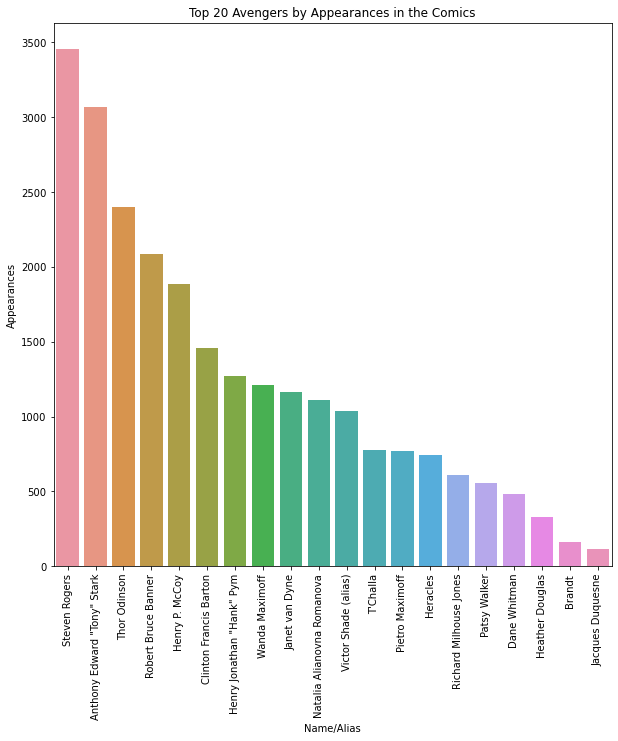

In [110]:
#Plotting the Top 20 Avengers by Appearance in the Comics

plt.figure(figsize=(10,10))
ax = sns.barplot(data=df.head(20).sort_values(by="Appearances", ascending=False), x="Name/Alias", y='Appearances')
plt.xticks(rotation=90)
plt.title('Top 20 Avengers by Appearances in the Comics')
plt.show()

Looks like `Steven Rogers`, `Tony Stark`, and `Thor Odinson` take our podium spots. Those first 7 are all male though... Lets see how many overall appearances were made by each Gender...

### Which Gender makes the most appearances?
***

In [111]:
# Making a sorted dataframe by gender so we can see overall numbers

gender_df = df.groupby(['Gender']).Appearances.sum().reset_index()
gender_df = gender_df.sort_values(by='Gender', ascending=False).reset_index(drop=True)

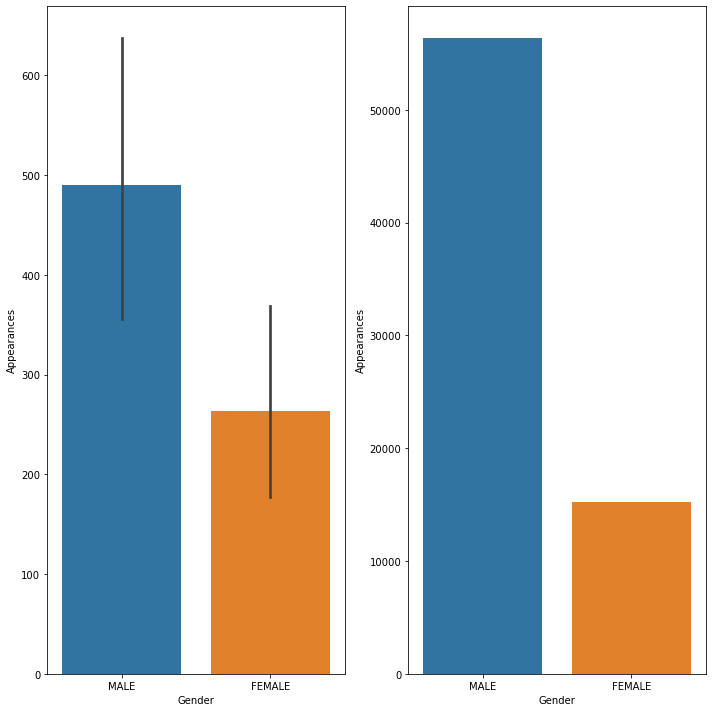

The average number of Male appearances is 490.
The average number of Female appearances is 263


In [114]:
# Plotting average appearances and overall appearances by Gender

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
ax = sns.barplot(data=df, x="Gender", y="Appearances")
plt.subplot(1,2,2)
ax2 = sns.barplot(data=gender_df, x="Gender", y="Appearances")
plt.tight_layout()
plt.show()

print("The average number of Male appearances is {}.".format(round(df[df["Gender"] == "MALE"].Appearances.mean())))
print("The average number of Female appearances is {}".format(round(df[df["Gender"] == "FEMALE"].Appearances.mean())))

Interesting... On average, `Male` Avengers get nearly 227 more appearances than `Female` Avengers. This could be misleading though, considering we have data where Avengers made an appearance in 1963... this is before the Civil Rights Act of 1964. A LOT has changed since then, so perhaps we can see a change in # of Appearances as time goes on! I believe in MARVEL! 

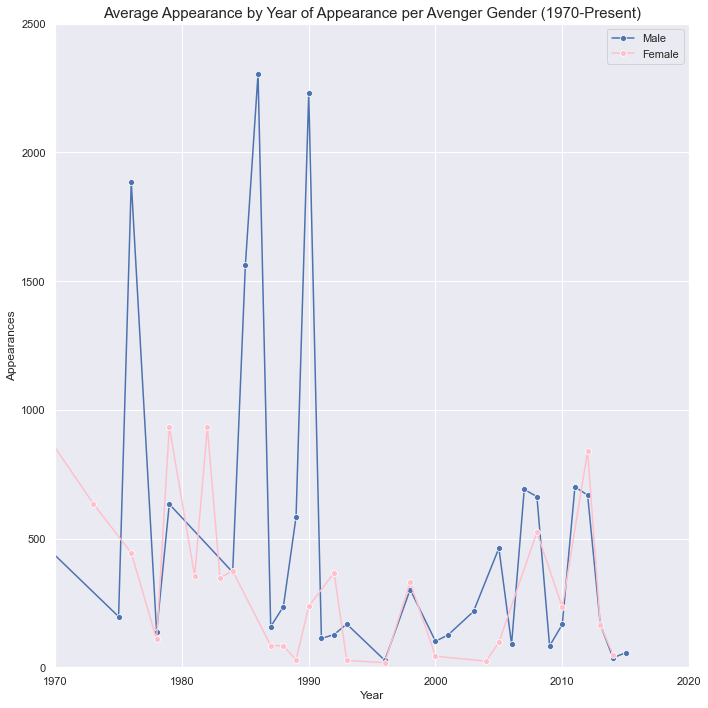

In [163]:
# Splitting the Data into two Datasets for cumulative sumation.

male_df = df[df["Gender"]=="MALE"].groupby(["Year"]).Appearances.mean().reset_index()
female_df = df[df["Gender"]=="FEMALE"].groupby(["Year"]).Appearances.mean().reset_index()

# Plotting the two!

plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
ax1 = sns.lineplot(data = male_df, x="Year", y="Appearances", marker="o")
ax2 = sns.lineplot(data = female_df, x="Year", y="Appearances", color='pink', marker="o")
plt.axis([1970, 2020, 0, 2500])
plt.title('Average Appearance by Year of Appearance per Avenger Gender (1970-Present)', fontsize=15)
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

Truthfully this isn't a graph I would present because there isn't much insight to it. We are limited in this data to the **Average Number of Appearances based on when they were introduced**, where I would much rather have had the cumulative number of appearances per `Gender` as the years went on. Aside from two spikes we see in 1990 and 1986, these graphs are fairly similar. One conclusion we can draw from this is that those two spikes are likely caused by some of our top appearing male avengers. Let's check!

In [165]:
df[(df["Year"] >= 1985) & (df["Year"] <= 1990)].sort_values("Appearances", ascending=False).head()

,Name/Alias,Appearances,Current,Gender,Probationary_Intro,Full_Avengers_Intro,Year,Years_since_joining,Status,FEMALE,MALE,Academy,Full,Honorary,Probationary,total_deaths,total_returns,Alive
73,Peter Benjamin Parker,4333,True,MALE,NaN,Apr-90,1990,31,Full,0,1,0,1,0,0,2,2,True
40,Benjamin Jacob Grimm,2305,False,MALE,NaN,Jun-86,1986,35,Full,0,1,0,1,0,0,1,1,True
57,Reed Richards,2125,True,MALE,NaN,Feb-89,1989,32,Full,0,1,0,1,0,0,0,0,True
58,Susan Richards (nee Storm),1761,False,MALE,NaN,Feb-89,1989,32,Full,0,1,0,1,0,0,0,0,True
49,Namor McKenzie,1561,False,MALE,NaN,Dec-85,1985,36,Full,0,1,0,1,0,0,1,1,True


**Conclusion**: Looks like `Peter Parker` aka "Spiderman" (1990) may be our outlier dragging those averages up in 1990! I wouldn't say that 1986 has an outlier though... `Ben Grimm` has an average of 2305, right around the average presented in the graph. 